In [ ]:
! gdown --id 10pq7rvk_FtY-ulQ8ldVM4QAtaR6LWt-j

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10pq7rvk_FtY-ulQ8ldVM4QAtaR6LWt-j
To: /content/uk-used-cars.zip
100% 1.15M/1.15M [00:00<00:00, 128MB/s]


In [ ]:
! unzip -o /content/uk-used-cars.zip -d /content/uk-used-cars

Archive:  /content/uk-used-cars.zip
  inflating: /content/uk-used-cars/audi.csv  
  inflating: /content/uk-used-cars/bmw.csv  
  inflating: /content/uk-used-cars/cclass.csv  
  inflating: /content/uk-used-cars/focus.csv  
  inflating: /content/uk-used-cars/ford.csv  
  inflating: /content/uk-used-cars/hyundi.csv  
  inflating: /content/uk-used-cars/merc.csv  
  inflating: /content/uk-used-cars/skoda.csv  
  inflating: /content/uk-used-cars/toyota.csv  
  inflating: /content/uk-used-cars/unclean cclass.csv  
  inflating: /content/uk-used-cars/unclean focus.csv  
  inflating: /content/uk-used-cars/vauxhall.csv  
  inflating: /content/uk-used-cars/vw.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/uk-used-cars/bmw.csv')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, train_size=0.6, random_state=42)

Валидационная выборка

In [ ]:
len(test) / len(df)

0.4000556534644282

In [ ]:
val, test = train_test_split(test, train_size=0.5, random_state=42)

In [ ]:
len(test) / len(df)

0.20007420461923756

In [ ]:
len(val) / len(df)

0.19998144884519062

Список фичей

In [ ]:
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [ ]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5133,X6,2015,25000,Semi-Auto,26100,Diesel,205,45.6,3.0
2121,X2,2019,31980,Automatic,4804,Petrol,145,34.0,2.0
6576,X2,2018,22995,Semi-Auto,24136,Petrol,145,38.7,2.0
8330,3 Series,2016,12999,Manual,52224,Diesel,125,62.8,2.0
3161,X3,2019,32980,Semi-Auto,1961,Diesel,150,54.3,2.0
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


Принцип преобразования категориальных признаков

In [ ]:
pd.get_dummies(train['transmission'])

,Automatic,Manual,Semi-Auto
5133,False,False,True
2121,True,False,False
6576,False,False,True
8330,False,True,False
3161,False,False,True
...,...,...,...
5734,False,False,True
5191,False,False,True
5390,False,False,True
860,False,False,True


In [ ]:
train['transmission']

5133    Semi-Auto
2121    Automatic
6576    Semi-Auto
8330       Manual
3161    Semi-Auto
          ...    
5734    Semi-Auto
5191    Semi-Auto
5390    Semi-Auto
860     Semi-Auto
7270    Automatic
Name: transmission, Length: 6468, dtype: object

Первый запуск catboost

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X = ['year', 'transmission', 'engineSize']

cat_features = ['transmission']

y = ['price']

In [ ]:
model = CatBoostRegressor(cat_features=cat_features,
                          eval_metric='MAPE',
                          verbose=100)

In [ ]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.068263
0:	learn: 0.4607010	test: 0.4559908	best: 0.4559908 (0)	total: 51.4ms	remaining: 51.3s
100:	learn: 0.1554098	test: 0.1538247	best: 0.1538247 (100)	total: 651ms	remaining: 5.79s
200:	learn: 0.1530463	test: 0.1523974	best: 0.1523588 (196)	total: 1.04s	remaining: 4.12s
300:	learn: 0.1516833	test: 0.1522258	best: 0.1522198 (299)	total: 1.58s	remaining: 3.68s
400:	learn: 0.1507169	test: 0.1519076	best: 0.1519009 (398)	total: 2.24s	remaining: 3.35s
500:	learn: 0.1501075	test: 0.1516689	best: 0.1516502 (493)	total: 2.76s	remaining: 2.75s
600:	learn: 0.1494997	test: 0.1516109	best: 0.1515971 (597)	total: 3.06s	remaining: 2.03s
700:	learn: 0.1490643	test: 0.1514998	best: 0.1514998 (700)	total: 3.33s	remaining: 1.42s
800:	learn: 0.1486800	test: 0.1513459	best: 0.1513318 (762)	total: 3.6s	remaining: 893ms
900:	learn: 0.1482781	test: 0.1512429	best: 0.1512429 (900)	total: 3.88s	remaining: 426ms
999:	learn: 0.1479669	test: 0.1512429	best: 0.1511823 (914)	total: 4.14s	r

In [ ]:
model.predict(test[X])

array([45367.67756432, 21884.38898346, 16091.74678864, ...,
       28392.87755636, 16091.74678864, 27668.06069946])

In [ ]:
test['price_pred'] = model.predict(test[X])

In [ ]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45367.677564
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21884.388983
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16091.746789
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32231.178149
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32231.178149
...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19305.028412
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,43991.055403
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28392.877556
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16091.746789


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [ ]:
error(test['price'], test['price_pred'])

3345.7246072100406
0.15166607293455014


Обучаемся на всех фичах

In [ ]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'random_seed': 42,
              'verbose': 100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.068263
0:	learn: 0.4607438	test: 0.4563750	best: 0.4563750 (0)	total: 55.1ms	remaining: 55s
100:	learn: 0.0904302	test: 0.0896388	best: 0.0896388 (100)	total: 653ms	remaining: 5.81s
200:	learn: 0.0781784	test: 0.0803125	best: 0.0803125 (200)	total: 1.48s	remaining: 5.88s
300:	learn: 0.0729925	test: 0.0764506	best: 0.0764506 (300)	total: 3.2s	remaining: 7.43s
400:	learn: 0.0695552	test: 0.0744676	best: 0.0744553 (399)	total: 4.71s	remaining: 7.04s
500:	learn: 0.0670683	test: 0.0732827	best: 0.0732827 (500)	total: 6.28s	remaining: 6.26s
600:	learn: 0.0652835	test: 0.0726170	best: 0.0726128 (597)	total: 8.7s	remaining: 5.77s
700:	learn: 0.0636320	test: 0.0720622	best: 0.0720500 (695)	total: 10.7s	remaining: 4.58s
800:	learn: 0.0623408	test: 0.0714586	best: 0.0714329 (794)	total: 11.3s	remaining: 2.81s
900:	learn: 0.0611487	test: 0.0711564	best: 0.0711321 (898)	total: 11.9s	remaining: 1.31s
999:	learn: 0.0601407	test: 0.0708439	best: 0.0708403 (998)	total: 12.5s	rema

In [ ]:
test['price_pred_all'] = model.predict(test[X])

In [ ]:
error(test['price'], test['price_pred_all'])

1556.5378327680894
0.07367840910148211


Количество итераций и learning rate

In [ ]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.08,
              'eval_metric': 'MAPE',
              'random_seed': 42,
              'verbose': 100}

In [ ]:
model = CatBoostRegressor(**parameters)

NameError: name 'CatBoostRegressor' is not defined

In [ ]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 7.34ms	remaining: 7.33s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 589ms	remaining: 5.24s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 1.14s	remaining: 4.53s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 1.73s	remaining: 4.01s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 2.29s	remaining: 3.43s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 3.21s	remaining: 3.2s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 4.52s	remaining: 3s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 5.87s	remaining: 2.5s
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 6.52s	remaining: 1.62s
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 7.11s	remaining: 781ms
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 7.71s	remaining: 0us

bestTest = 0.068637


Обучение на всех данных

In [ ]:
len(train)

6468

In [ ]:
len(val)

2156

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
model.best_iteration_ + 1

994

In [ ]:
parameters = {'iterations': model.best_iteration_ + 1,
              'cat_features': cat_features,
              'learning_rate': 0.08,
              'eval_metric': 'MAPE',
              'random_seed': 42,
              'verbose': 100}

NameError: name 'model' is not defined

In [ ]:
parameters

NameError: name 'parameters' is not defined

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train_full[X], train_full[y])

0:	learn: 0.4538016	total: 11.9ms	remaining: 11.8s
100:	learn: 0.0854178	total: 666ms	remaining: 5.88s
200:	learn: 0.0745022	total: 1.33s	remaining: 5.27s
300:	learn: 0.0701717	total: 2.17s	remaining: 5s
400:	learn: 0.0676577	total: 3.68s	remaining: 5.44s
500:	learn: 0.0656926	total: 5.12s	remaining: 5.04s
600:	learn: 0.0638104	total: 5.77s	remaining: 3.77s
700:	learn: 0.0624302	total: 6.45s	remaining: 2.69s
800:	learn: 0.0612275	total: 7.13s	remaining: 1.72s
900:	learn: 0.0599823	total: 7.81s	remaining: 806ms
993:	learn: 0.0590330	total: 8.44s	remaining: 0us


In [ ]:
test['price_pred_all_features_and_data'] = model.predict(test[X])

In [ ]:
error(test['price'], test['price_pred_all'])

1557.829933640045
0.07355150889681633


Метрики регрессии

Меняем функцию оптимизации

In [ ]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [ ]:
parameters = {'cat_features': cat_features,
              'loss_function': 'MAE',
              'learning_rate': 0.1,
              'eval_metric': 'MAPE',
              'random_seed': 42,
              'verbose': 100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.3849345	test: 0.3793341	best: 0.3793341 (0)	total: 8.13ms	remaining: 8.12s
100:	learn: 0.0764009	test: 0.0774578	best: 0.0774578 (100)	total: 694ms	remaining: 6.18s
200:	learn: 0.0666216	test: 0.0706498	best: 0.0706498 (200)	total: 1.53s	remaining: 6.09s
300:	learn: 0.0628577	test: 0.0695086	best: 0.0694924 (298)	total: 2.34s	remaining: 5.43s
400:	learn: 0.0605748	test: 0.0687890	best: 0.0687826 (399)	total: 3.04s	remaining: 4.53s
500:	learn: 0.0589764	test: 0.0683467	best: 0.0683222 (490)	total: 4.06s	remaining: 4.05s
600:	learn: 0.0579201	test: 0.0680567	best: 0.0680567 (600)	total: 5.32s	remaining: 3.53s
700:	learn: 0.0570454	test: 0.0678671	best: 0.0678659 (681)	total: 6.55s	remaining: 2.79s
800:	learn: 0.0563072	test: 0.0676018	best: 0.0676018 (800)	total: 7.27s	remaining: 1.8s
900:	learn: 0.0555798	test: 0.0674500	best: 0.0674384 (889)	total: 7.95s	remaining: 874ms
999:	learn: 0.0548863	test: 0.0673326	best: 0.0672972 (972)	total: 8.64s	remaining: 0us

bestTest = 0.06

Анализ ошибок

In [ ]:
test['error'] = test['price'] - test['price_pred_all']

In [ ]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_all,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,-4427.539722
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,2077.439726
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,-462.408766
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,-20154.002131
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,-5225.139852
...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,727.736892
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,-1879.069740
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,16.122100
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,1180.679005


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

<Axes: >

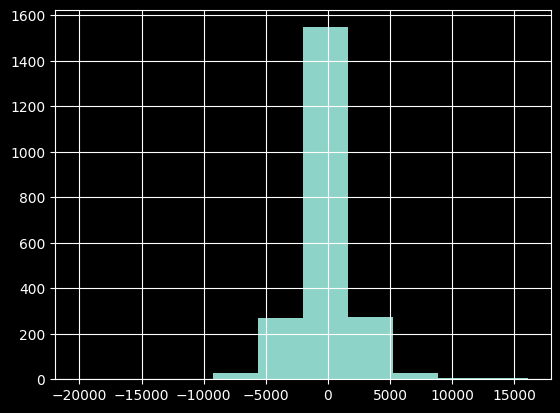

In [ ]:
test['error'].hist()

In [ ]:
import numpy as np

In [ ]:
test['error'].mean()

Абсолютная ошибка

In [ ]:
test['error_abs'] = abs(test['error'])

In [ ]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_all,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,-4427.539722,4427.539722
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,2077.439726,2077.439726
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,-462.408766,462.408766
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,-20154.002131,20154.002131
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,-5225.139852,5225.139852
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,727.736892,727.736892
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,-1879.069740,1879.069740
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,16.122100,16.122100
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,1180.679005,1180.679005


<Axes: >

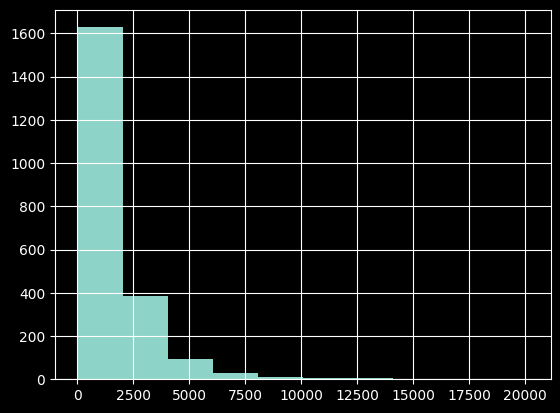

In [ ]:
test['error_abs'].hist()

In [ ]:
test['error_abs'].describe()

count     2157.000000
mean      1556.537833
std       1702.708957
min          1.441968
25%        502.584301
50%       1036.389615
75%       1976.352551
max      20154.002131
Name: error_abs, dtype: float64

In [ ]:
test.sort_values('error_abs', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_all,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,-20154.002131,20154.002131
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31414.930791,16135.069209,16135.069209
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85557.979289,-14562.979289,14562.979289
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28415.436594,14104.563406,14104.563406
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,31724.541179,13255.458821,13255.458821
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,29660.941626,12834.058374,12834.058374
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47539.935472,12459.064528,12459.064528
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46584.465196,12077.534804,12077.534804
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42415.516762,11583.483238,11583.483238
5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27479.001287,10970.998713,10970.998713


Анализ абсолютной ошибки

In [ ]:
test['price_group'] = pd.qcut(test['price'], 5)

In [ ]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_all,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,-4427.539722,4427.539722,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,2077.439726,2077.439726,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,-462.408766,462.408766,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,-20154.002131,20154.002131,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,-5225.139852,5225.139852,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,727.736892,727.736892,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,-1879.069740,1879.069740,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,16.122100,16.122100,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,1180.679005,1180.679005,"(13995.0, 18500.0]"


In [ ]:
t = test.groupby('price_group')[['error_abs', 'error']].agg(['count', 'mean'])

In [ ]:
test['error_abs'].mean()

1556.5378327680894

In [ ]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [ ]:
t = t.drop('error_count', axis=1)

In [ ]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [ ]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff
price_group,,,,
"(1199.999, 13995.0]",435,911.683821,-472.967318,-644.854011
"(13995.0, 18500.0]",432,1193.118985,-334.385576,-363.418848
"(18500.0, 23131.6]",427,1329.823427,-234.437431,-226.714406
"(23131.6, 29990.0]",432,1754.321276,-402.787968,197.783443
"(29990.0, 74990.0]",431,2598.006606,692.886570,1041.468773
